In [1]:
pkg load image

1. 图像的取样和量化
   - 取样就是取像素点，量化把灰度值量化到256个灰度级
2. 数字图像的表示
   - 图像定义为二位函数f(x, y)，x,y是空间坐标f(x, y)是点的幅值
3. 数字图像的质量
   - 灰度级：表明像素明暗程度整数量
   - 空间分辨率：图像的尺寸
   - 层次：表明图像实际拥有的灰度级的数量，图像的实际层次越多，图像的质量就越好
   - 对比度：指图像中灰度反差的大小，对比度=最大亮度/最小亮度
     - 对比度较小，图像就会比较模糊；一般来说，对比度大，方差就越大
     - 图像内容细节越多，对比度容易较大
4. 像素间的关系（邻域处理方法是图像增强和复原的核心）
   - 相邻像素
     - 4邻域
     - D邻域
     - 8邻域
   - 连通性：不仅是位置上相邻，还要灰度值满足特定的相似性准则
     - 4连通
     - 8连通
     - m连通：首先两个像素点是8连通的，然后这两个像素点的4连通区域交集为空
       - 可以消除8连通通路的歧义
     - 三种连通可分别形成三种通路
   - 距离
     - 距离的定义，满足三大原则：
       - 非负；交换性；三角形原则
     - 欧式距离
     - D4距离（城市距离）：矩形长+宽，区域构成一个菱形
     - D8距离（棋盘距离）：矩形长、宽的最大值，区域构成一个正方形

#### 视觉基础知识
- 色度学
  - 彩色视觉：人眼的明视觉的一种功能
    - 在夜晚或微光下不同波长光的敏感性左移——暗视觉视敏函数
    - 表征彩色光的三个基本量
      - 亮度：代表着彩色光所包含的能量
      - 色调：光的一种属性，可以区分不同的光
      - 饱和度：颜色的深浅程度
  - 三基色原理（RGB）
    - 彩色光的合成
      - 直接法
      - 空间混色法
      - 时间混色法
      - 生理混色法
    - 打印色：CMY（青色cyan，洋红色magenta和黄色）和CMYK（K是black黑色）
      - CMY = 1 - RGB
    - Grassman Law（格拉斯曼颜色混合定律）
      - 任给的彩色光C，其配色方程如下：`C = r' + 4.5907g' + 0.0601b'，其中r'+g'+b' = 1`
      - 称为RGB制的相对色系数或者色度坐标
- 颜色空间（彩色系统）
  - 麦克斯韦尔的颜色三角形，中心是白色
  - 直角等腰三角形
  - 芒塞尔（Munsell）颜色系统：
    - 将圆十等分成十个扇区，每个扇区表示一种颜色，然后再将每个扇区再等分十份
    - 直径两端互为互补色
    - 圆周上饱和度最大，向圆心逐渐减小直到白色
    - 构成柱坐标系：角度->色调，半径->饱和度，高度->光强
  - RGB颜色系统：笛卡尔坐标系
  - YUV颜色系统：欧洲电视系统
    - YUV与RGB转换
  - YIQ颜色系统：北美电视系统
  - HSI颜色空间（色调Hue，色饱和度Saturation或Chroma，亮度Intensity或Brightness）
    - 亮度与图像的色彩信息无关
    - 色调和饱和度与人眼的感受方式一致
    - 通常把色调和饱和度合称为色度，表示颜色的类别与深浅程度
    - HSI比RGB更符合人的视觉特性
    - HSI与RGB的转换
  - HSV颜色空间（hue, saturation, value）：圆柱坐标系中的一个倒圆锥形子集
    - 角度对应色调：0°对应红色，120°对应绿色，240°对应蓝色
    - 半径对应饱和度S，最上圆盘S取值从0到1
    - 注意圆锥是倒的，越上颜色越亮，value取值从0到1
    - 在圆锥的顶点处，V=0，H和S没有意义，代表黑色
    - 圆锥的顶面中线点处，V=1，S=0，H没有意义，代表白色
    - 在S=0处，H没有意义
    - HSV与RGB的转换（公式好复杂）
  - YCrCb颜色系统：国际电联制定的全球统一的数字电视标准，是通过对RGB空间作线性变换得来
    - Y平面表示亮度信息，CrCb平面表示色度
    - 人眼对亮度的变化比对色度的变化更加敏感
    - 与RGB之间的转换
- 图像质量评价方法：主要是图像的保真度，偏离原始标准图像的程度
  - 主观评价法，打分法，既要有专家又要有外行
  - 数值计算法
    - 均方误差法
      - 能量归一化的均方误差法
      - 峰值归一化的均方误差法

#### 空间域图像增强
##### 图像增强
- 处理方法
  - 空域方法
    - 点处理
    - 模板处理
  - 频域方法
- 处理策略
  - 全局处理
  - 局部处理
- 处理对象
  - 灰度图像
  - 彩色图像
- 点运算
  - 反转变换（反色）
  - 对数变换
  - 幂次变换
  - 对比度拉伸
  - 灰度级切片
  - 位平面切片
- 代数运算：加、减、乘、除（一幅图像取反和另一幅图像相乘）
- 逻辑运算：非、与、或、异或
- 几何变换
  - 平移变换
  - 旋转变换
  - 镜像变换：水平镜像和垂直镜像
  - 转置变换
  - 放缩变换：插值
- 直方图运算(Histogram)
  - 灰度直方图是灰度级的函数，反映图像中每种灰度出现的频率
  - 直方图对应概率密度函数，反映的是图像的统计特征
  - 利用直方图，可以直观地看出图像中的像素亮度分布情况
  - 通过灰度直方图均衡化处理、平滑处理、归一化处理可以对图像的质量进行调整
  - 通过对直方图的分析可以确定用于二值化处理所用的阈值
  - 图像与直方图之间是一种多对一的映射关系
  - 归一化（标准化）直方图
    - 将某一灰度像素出现的次数改成其频率，即次数除以像素总个数
    - 归一化直方图中所有部分之和为1
- 直方图应用
  - 图像在数字化后其可用灰度级与实际占用的灰度级数之间的关系可分为三种
    - 直方图覆盖了全部灰度级，灰度级得到了充分的利用，图像对比度较高；
    - 未能全部占满灰度级，图像对比度较差（分为暗色图像和亮色图像）
    - 直方图超出了灰度级所覆盖的动态范围（低对比度图像）
  - 边界阈值选取
    - 假设某图像的灰度直方图具有二峰性，则表明这个图像的较亮的区域和较暗的区域可以较好的分离
    - 若这一点为阈值点，可以得到很好的图像二值化处理效果
  - 直方图均衡化（图像增强方法）
    - 希望一幅图像的像素占有全部可能的灰度级且分布均匀，能够得到具有高对比度和多变的灰度色调
    - 使用的方法是灰度级变换
    - 基本思想是把原始图的直方图变换为均匀分布的形式，增强了图像整体对比度效果
    - 图像灰度正规化
    - 
  - 直方图规定化（也称为直方图匹配）
    - 直方图均衡化的实质是减少图像的灰度等级，以换取对比度的增大
      - 输出图像的灰度级极有可能被过多地合并；由于灰度级的吞噬也易造成图像信息的丢失
    - 直方图均衡化的特点是能自动的增强图像的对比度，但它的具体增强效果不易控制，结果总是全局均衡化的直方图
    - 要使直方图变成某个特定的形状，有选择地增强某个灰度范围内的对比度
    - 定义：令原始图像转换成期望输出的具有人为规定的直方图
    - 算法实现：
      - 对原图进行直方图均衡化，求出灰度级变换T
      - 对规定图像进行直方图均衡化，求出灰度级变换G，同时求出逆变换G'
      - 求出复合变换H
      - 用H对原图像做灰度级变换即可得到直方图规定化的增强图像
- 空间滤波器
  - 使用空间模板进行的图像处理，称为空间滤波；空间模板本身被称为空间滤波器（长宽一般为奇数）
  - 平滑空间滤波器
    - 存在边缘模糊的效应，解决方法：
      - 取阈值的邻域均值法：如果某像素的灰度大于目标像素的邻域均值并且超过阈值，就用均值代替
      - 邻域加权均值法（各元素权值之和必须为1），加权原则：
        - 灰度相近的权重大，灰度相差较大的权重小
    - 中值滤波的快速算法
  - 空域低通滤波器：高值不能通过，有图像平滑的作用
  - 空域高通滤波器（某些系数为负数）：低值不能通过，有图像锐化的作用
  - 锐化空间滤波器（也被称为微分滤波器）
    - 二阶微分滤波器：拉普拉斯算子 f(x+1)+f(x-1)-2f(x)
    - 一阶微分滤波器：梯度算子 f(x+1)-f(x)
    - 对于量化和离散化的数字图像而言，微分可以用差分来代替
  - 图像平滑的目的是去噪声，图像噪声的来源：
    - 通道噪声：产生于图像信息的传递中，其值与图像信息的强弱无关
    - 倍增噪声：噪声与信号成正比
    - 量化噪声：灰度在量化的过程中，不可避免地产生量化误差
    - 噪声特点：噪声像素的灰度是空间不相关的，即它与临近像素显著不同
  - 图像锐化：目的是增强图像中对象的边缘，主要用于图像边缘增强、检测和提取
    - 边缘是图像最基本的特征之一
    - 根据像素灰度变化的快慢即是阶跃性变化还是屋顶状变化，边缘可以分为阶跃性边缘和线条型边缘两种

In [5]:
I = imread("../images/huaji.jpg");

In [6]:
i = rgb2gray(I);

In [ ]:
imshow(i);

#### 图像检索

- 纹理特征d
  - Tamura纹理表示法
    - 对比度：依赖于图像的灰度分布
    - 粗细度：与图像的分辨率有关
- 形状特征
- 评价指标
  - 查准率和查全率
  


#### 彩色图像处理
##### 伪彩色增强处理
- 强度分层技术
  - 将一幅图像描述为三维函数(x, y, f(x,y))

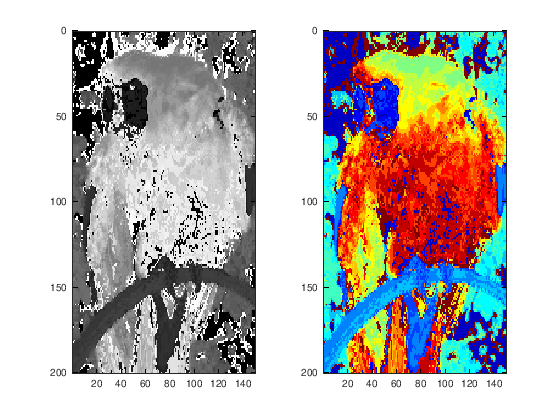

In [14]:
% 强度分层技术，注意必须是可分层图像
I = imread("https://upload.wikimedia.org/wikipedia/commons/7/7c/Adaptative_8bits_palette_sample_image.png");
x = grayslice(I, 16);
subplot(1, 2, 1), subimage(I);
subplot(1, 2, 2), subimage(x, jet(16));

- 灰度级到彩色转化技术
  - 对任何输入像素的灰度级进行三个独立的变换，三个变换的结果分别送入rgb三个通道，然后产生一幅合成图像
  - 就是分别用三个函数对灰度值进行处理，最后组合到RGB颜色空间
  - 可以用来对某一个分量进行增强
  - 对灰度图像进行伪彩色再现
##### 全彩色图像处理
- 一般真彩色增强方法的基本步骤是：
  - 将R、G、B分量图转化为H、S、I、分量图
  - 利用灰度图增强方法增强其中的I分量图
  - 再将结果转换为R、G、B分量图来表示
  - 结果并不会改变图像的彩色内容，但亮度分量得到了增强，整个图会比原来更亮些。
- 全彩色图像处理研究分为两大类：
  - 分别处理每一分量图像，然后从分别处理过的分量图像合成彩色图像
  - 直接对彩色像素处理，三个颜色分量组合成一个像素向量
    - 空间滤波处理：彩色变换函数，不是一对一，一般是多对一
- 彩色转换（灰度变换）
  - 彩色分层
  - 用补色代替
  - 对各灰度进行变换，可以增强对比度，亮的更亮，暗的更暗
- 彩色平衡
  - 各分度灰度变换
  - 直方图处理
- 彩色图像平滑
  - 彩色图像均值平滑（邻域均值滤波）：使每一个分量等于该分量的一个邻域内像素值的平均值
  - 将RGB转换到HSI，仅对亮度进行平滑处理，色调和饱和度不变
- 彩色图像尖锐化（拉普拉斯微分）
  - 拉普拉斯微分近似等于该点像素的5倍减去该像素上下左右4个点的像素值
  - 可以分别对RGB进行锐化处理，也可以转换为HSI后只对I进行拉普拉斯变换
- 注意不能对彩色图像直接进行直方图均衡化处理，会变色，可转换成HSI后只对强度进行处理

#### 基于内容的图像检索（CBIR Query By Image Content）
##### 简介
- 目前还无法对一幅图像的内容进行自动注释
- 查询将根据图像视觉特征相似度进行查询
- 基于样例的图像查询方式，用户提供具有代表性的图片
- 检索过程是一个通过交互而获得优化的过程
![图像检索的基本过程](./images/图像检索的基本过程.png)

- CBIR系统工作过程（查询方式）
  - 利用采样图像，选择图像数据库中的图像
  - 利用范例图像：来自图像库之外，用户自己提供
  - 利用局部图像，先提取图像区域，再利用该图像区域检索，或利用不同图像的不同区域的拼图
  - 利用绘制图像：用户绘制出来的图作为查询图像，描述用户的检索目标或目标场景
##### 图像内容描述特征-特征提取
###### 视觉特征
- 通用的视觉特征和领域相关的视觉特征
  - 前者用于描述所有图像共有的特征，与图像的具体类型或内容无关，主要包括色彩、纹理和形状
  - 后者则建立在对所描述图像内容的某些先验知识的基础上，与具体应用紧密相关，例如人的面部特征或指纹特征
- 由于图像的内容是通过特征来描述的。并且影响了后继相似度比较，因此视觉特征选取十分重要，要根据不同应用进行选择
- 特征提取
  - 颜色特征
    - 与图像本身的尺寸，方向，视角的依赖性较小，具有较高的鲁棒性
    - 需要选择合适的颜色空间来抽取描述图像内容的颜色特征
    - 需要采用一定的量化方法将颜色特征表达为向量形式，在向量空间上进行相似度比较
    - 对于不同的颜色特征表示，都要定义一种合适的相似度（距离）标准衡量颜色上的相似性
    - 颜色直方图
      - 颜色直方图可以基于不同的颜色空间
      - 在描述颜色特征方面，倾向于选择面向感知的颜色空间，如HSV
      - 不同内容的两幅图像的颜色直方图可能完全一样
    - 其他颜色特征：颜色矩（color moment），颜色聚合向量（CCV），颜色相关图
  - 纹理特征
    - 纹理概述：对纹理的感受是与心理效果相结合的，语言难以描述；纹理效果
      - 纹理可以认为是灰度在颜色空间以一定的形式变换而产生的图案
      - 一般来说，纹理图像中灰度分布具有某种周期性，即便灰度是随机的，也具有一定的统计特性
      - 纹理通常与图像频谱中的高频分量密切联系，光滑的图像（主要是低频分量）一般不认为是纹理图像
    - 纹理表示
      - Tamura表示法
        - 对比度：依赖于像素的灰度分布，对比度公式
        - 粗细度（粗糙度）：与图像分辨率正相关，粗细度公式
        - 方向性：是一个全局纹理特征，与纹理基元形状及排列规则有关
        - 利用这三个量可组成一个三维空间，在空间中，两点的欧式距离近似看作纹理效果
      - 联合概率矩阵表示     
      - 小波表示
  - 形状特征
    - 获得形状特征需要先对形状进行分割，所以形状特征的提取会受到图像分割效果的影响
    - 形状表示方法可分为两类：基于边缘和基于区域
    - 描述方法
      - 傅里叶描述子
      - 不变矩描述子
      - 有限元素法、旋转函数、小波描述子等
  - 空间关系特征
##### 相似性度量方法
- 图像相似性的比较
  - 色彩、纹理和形状等特征被提取出来后，形成特征向量，用其表征图
  - 在图像检索中，用特征向量来进行比较
- 欧拉距离：特征各分量正交无关，且各维度重要程度相同
- 直方图相交：也是用来计算颜色直方图之间的距离
- 图像特征性能评价
  - 查准率：系统返回的查询结果中相关正确图像的数目占所有返回图像数目的比例
  - 查全率：系统返回的查询结果中相关正确图像的数目占图像库中所有相关图像（包括返回的和未返回的）的比例
  - 实践结果表明HSV空间中的直方图能提供最优的检索效果

#### 图像编码
- 数字图像的存储和传输，关键是图像编码
![](./images/数字通信系统模型.png)
- 在数字通信系统模型中有两次编、译码：信源编码、信源译码；信道编码、信道译码
  - 力求用最少的数码传递最大的信息量
  - 若解码图像与原始图像相同，则称编解码过程是无损的，若不同，则称有损的
  - 信道编码的任务是解决可靠性问题：使信号在传输过程中不出错或少出错，即使出错也要有能力纠正错误